# Bag of Words Meets Bags of Popcorn

## 튜토리얼 파트 2 Word Vectors
* 딥러닝 기법인 Word2Vec을 통해 단어를 벡터화 해본다
* t-SNE를 통해 벡터화 한 데이터를 시각화 해본다
* 딥러닝과 지도학습의 랜덤포레스트를 사용하는 하이브리드 방식을 사용한다

# Word2Vec(Word Embedding to Vector)
컴퓨터는 숫자만 인식할 수 있고 한글, 이미지는 바이너리 코드로 저장된다. 튜토리얼 파트1에서는 Bag of Word라는 개념을 사용해서 문자를 벡터화하여 머신러닝 알고리즘이 이해할 수 있도록 벡터화 해주는 작업을 하였다.

* one hot encoding(예 [0000001000]) 혹은 Bag of Word에서 vector size가 매우 크고 sparse 하므로 neural net 성능이 잘 나오지 않는다.
* 주위 단어가 비슷하면 해당 단어의 의미는 유사하다 라는 아이디어
* 단어를 트레이닝 시킬 때 주위 단어를 label로 매치하여 최적화
* 단어를 의미를 내포한 dense vector로 매칭 시키는 것
* Word2Vec은 분산 된 텍스트 표현을 사용하여 개념 간 유사성을 본다. 예를 들어, 파리와 프랑스가 베를린과 독일이 (수도와 나라) 같은 방식으로 관련되어 있음을 이해한다.

![Country and Capital Vectors Projected by PCA](https://1.bp.blogspot.com/-Q7F8ulD6fC0/UgvnVCSGmXI/AAAAAAAAAbg/MCWLTYBufhs/s1600/image00.gif)
이미지 출처 : [https://opensource.googleblog.com/2013/08/learning-meaning-behind-words.html](https://opensource.googleblog.com/2013/08/learning-meaning-behind-words.html)

* 단어의 임베딩과정을 실시간으로 시각화 : [word embedding visual inspector](https://ronxin.github.io/wevi/)
![New model architecture](https://camo.githubusercontent.com/1a8235d525ad46485e764e5008cbc29c8c17a5be/68747470733a2f2f692e696d6775722e636f6d2f795859314c78562e706e67)


출처 : [https://arxiv.org/pdf/1301.3781.pdf](https://arxiv.org/pdf/1301.3781.pdf) Tomas Mikolov, llya Sutskever, Kai Chen, Greg Corrado, and Jeffrey Dean, Distributed Representations of Words and Phrases and their Compositionality. In Proceedings of NIPS, 2013
* CBOW와 Skip-Gram 기법이 있다.
    * CBOW(continuous bag-of-words)는 전체 텍스트로 하나의 단어를 예측하기 때문에 작은 데이터셋일수록 유리하다.
    * 아래 예제에서 _에 들어갈 단어를 예측한다.
    
        1) _가 맛있다.<br />
        2) _를 타는 것이 재미있다.<br />
        3) 평소보다 두 _로 많이 먹어서 _가 아프다.<br />
    * Skip-Gram은 타겟 단어들로부터 원본 단어를 역으로 예측하는 것이다. CBOW와는 반대로 컨텍스트-타겟 쌍을 새로운 발견으로 처리하고 큰 규모의 데이터셋을 가질 때 유리하다.
    * *배*라는 단어 주변에 올 수 있는 단어를 예측한다.
        
        1) *배*가 맛있다<br />
        2) *배*를 타는 것이 재미있다.<br />
        3) 평소보다 두 *배*로 많이 먹어서 *배*가 아프다

# Word2Vec 참고자료
* [word2vec 모델 · 텐서플로우 문서 한글 번역본](https://tensorflowkorea.gitbooks.io/tensorflow-kr/g3doc/tutorials/word2vec/)
* [Word2Vec으로 문장 분류하기 · ratsgo's blog](https://ratsgo.github.io/natural%20language%20processing/2017/03/08/word2vec/)
* [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781v3.pdf)
* [Distributed Representations of Words and Phrases and their Compositionality](http://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)
* [CS224n: Natural Language Processing with Deep Learning](http://web.stanford.edu/class/cs224n/syllabus.html)
* [Word2Vec Tutorial - The Skip-Gram Model · Chris McCormick](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)

# Gensim
* [gensim: models.word2vec - Deep learning with word2vec](https://radimrehurek.com/gensim/models/word2vec.html)
* [gensim: Tutorials](https://radimrehurek.com/gensim/tutorial.html)
* [한국어와 NLTK, Gensim의 만남 - PyCon Korea 2015](https://www.lucypark.kr/docs/2015-pyconkr/)

In [2]:
# 출력이 너무 길어지지 않게 하기 위해 찍지 않도록 했으나
# 실제 학습할 때는 아래 두 줄을 주석처리 하는 것을 권장한다.
import warnings
warnings.filterwarnings('ignore')

#### File Descriptions
* labeledTrainData - 레이블이 지정된 훈련 세트. 파일은 탭으로 구분되며 각 검토에 대한 ID, 감정 및 텍스트가 포함
* testData - 테스트 세트
* unlabeledTrainData - 레이블이 없는 추가 훈련 세트.
* sampleSubmission - 쉼표로 구분된 샘플 제출 파일의 올바른 형식 표시

#### Data fields
* sentiment - 긍정의 경우 1, 부정의 경우 0

In [3]:
import pandas as pd

train = pd.read_csv('./data/labeledTrainData.tsv', header=0, delimiter='\t', quoting=3)
test = pd.read_csv('./data/testData.tsv', header=0, delimiter='\t', quoting=3)
unlabeled_train = pd.read_csv('./data/unlabeledTrainData.tsv', header=0, delimiter='\t', quoting=3)

print(train.shape)
print(test.shape)
print(unlabeled_train.shape)

print(train['review'].size)
print(test['review'].size)
print(unlabeled_train['review'].size)

(25000, 3)
(25000, 2)
(50000, 2)
25000
25000
50000


In [4]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [5]:
test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [6]:
unlabeled_train.head()

,id,review
0,"""9999_0""","""Watching Time Chasers, it obvious that it was..."
1,"""45057_0""","""I saw this film about 20 years ago and rememb..."
2,"""15561_0""","""Minor Spoilers<br /><br />In New York, Joan B..."
3,"""7161_0""","""I went to see this film with a great deal of ..."
4,"""43971_0""","""Yes, I agree with everyone on this site this ..."


In [7]:
from KaggleWord2VecUtility import KaggleWord2VecUtility

In [8]:
train['review'][0][:700]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

In [9]:
KaggleWord2VecUtility.review_to_wordlist(train['review'][0])[:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [11]:
import nltk
nltk.download('punkt')

sentences = []
for review in train["review"]:
    sentences += KaggleWord2VecUtility.review_to_sentences(
                                        review, remove_stopwords=False)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dhcho\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [20]:
sentences[3][:10]

['some', 'of', 'it', 'has', 'subtl', 'messag', 'about', 'mj', 's', 'feel']

In [16]:
for review in unlabeled_train["review"]:
    sentences += KaggleWord2VecUtility.review_to_sentences(
                                        review, remove_stopwords=False)

In [17]:
len(sentences)

795538

In [18]:
sentences[0][:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [19]:
sentences[1][:10]

['mayb', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into']

## Word2Vec 모델을 학습
전처리를 거쳐 파싱된 문장의 목록으로 모델을 학습시킬 준비가 되었다

## Gensim
* [gensim: models.word2vec - Deep learning with word2vec](https://radimrehurek.com/gensim/models/word2vec.html)

## Word2Vec 모델의 파라메터
* 아키텍쳐 : 아키텍쳐 옵션은 skip-gram (default) 또는 CBOW 모델이다. skip-gram (default)은 느리지만 더 나은 결과를 낸다.
* 학습 알고리즘 : Hierarchical softmax (default) 또는 negative 샘플링. 여기에서는 기본값이 잘 동작한다.
* 빈번하게 등장하는 단어에 대한 다운 샘플링 : Google 문서는 .00001에서 .001 사이의 값을 권장한다. 여기에서는 0.001에 가까운 값이 최종 모델의 정확도를 높이는 것으로 보여진다.
* 단어 벡터 차원 : 많은 feature를 사용한다고 항상 좋은 것은 아니지만 대체적으로 좀 나은 모델이 된다. 합리적인 값은 수십에서 수백 개가 될 수 있고 여기에서는 300으로 지정했다.
* 컨텍스트 / 창 크기 : 학습 알고리즘이 고려해야하는 컨텍스트의 단어 수는 얼마나 될까? hierarchical softmax 를 위해 좀 더 큰 수가 좋지만 10정도가 적당하다.
* Worker threads : 실행할 병렬 프로세스의 수로 컴퓨터마다 다르지만 대부분의 시스템에서 4에서 6사이의 값을 사용한다.
* 최소 단어 수 : 어휘의 크기를 의미있는 단어로 제한하는데 도움이 된다. 모든 문서에서 여러 번 발생하지 않는 단어는 무시된다. 10에서 100사이가 적당하며, 이 경진대회의 데이터는 각 영화가 30개씩의 리뷰가 있기 때문에 개별 영화 제목에 너무 많은 중요성이 붙는 것을 피하기 위해 최소 단어 수를 40으로 설정한다. 그 결과 전체 어휘 크기는 약 15,000 단어가 된다. 높은 값은 제한 된 실행시간에 도움이 된다.

In [21]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [22]:
# 파라메터값 지정
num_features = 300 # 문자 벡터 차원 수
min_word_count = 40 # 최소 문자 수
num_workers = 4 # 병렬 처리 스레드 수
context = 10 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도 수 Downsample

# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(sentences,
                         workers=num_workers,
                         size=num_features,
                         min_count=min_word_count,
                         window=context,
                         sample=downsampling)
model

2018-07-12 14:07:00,445 : INFO : 'pattern' package not found; tag filters are not available for English
2018-07-12 14:07:00,475 : INFO : collecting all words and their counts
2018-07-12 14:07:00,475 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-07-12 14:07:00,522 : INFO : PROGRESS: at sentence #10000, processed 225803 words, keeping 12465 word types
2018-07-12 14:07:00,563 : INFO : PROGRESS: at sentence #20000, processed 451892 words, keeping 17070 word types
2018-07-12 14:07:00,606 : INFO : PROGRESS: at sentence #30000, processed 671314 words, keeping 20370 word types
2018-07-12 14:07:00,649 : INFO : PROGRESS: at sentence #40000, processed 897814 words, keeping 23125 word types
2018-07-12 14:07:00,691 : INFO : PROGRESS: at sentence #50000, processed 1116962 words, keeping 25365 word types
2018-07-12 14:07:00,733 : INFO : PROGRESS: at sentence #60000, processed 1338403 words, keeping 27283 word types
2018-07-12 14:07:00,777 : INFO : PROGRESS: at senten

2018-07-12 14:07:03,991 : INFO : PROGRESS: at sentence #710000, processed 15880371 words, keeping 82560 word types
2018-07-12 14:07:04,039 : INFO : PROGRESS: at sentence #720000, processed 16105658 words, keeping 83036 word types
2018-07-12 14:07:04,083 : INFO : PROGRESS: at sentence #730000, processed 16332039 words, keeping 83571 word types
2018-07-12 14:07:04,134 : INFO : PROGRESS: at sentence #740000, processed 16553072 words, keeping 84127 word types
2018-07-12 14:07:04,184 : INFO : PROGRESS: at sentence #750000, processed 16771399 words, keeping 84599 word types
2018-07-12 14:07:04,229 : INFO : PROGRESS: at sentence #760000, processed 16990803 words, keeping 85068 word types
2018-07-12 14:07:04,273 : INFO : PROGRESS: at sentence #770000, processed 17217940 words, keeping 85644 word types
2018-07-12 14:07:04,318 : INFO : PROGRESS: at sentence #780000, processed 17448086 words, keeping 86160 word types
2018-07-12 14:07:04,366 : INFO : PROGRESS: at sentence #790000, processed 176751

2018-07-12 14:07:53,654 : INFO : EPOCH 3 - PROGRESS: at 47.28% examples, 602569 words/s, in_qsize 7, out_qsize 0
2018-07-12 14:07:54,658 : INFO : EPOCH 3 - PROGRESS: at 52.04% examples, 603373 words/s, in_qsize 7, out_qsize 0
2018-07-12 14:07:55,661 : INFO : EPOCH 3 - PROGRESS: at 56.60% examples, 602265 words/s, in_qsize 7, out_qsize 0
2018-07-12 14:07:56,673 : INFO : EPOCH 3 - PROGRESS: at 61.30% examples, 602600 words/s, in_qsize 7, out_qsize 0
2018-07-12 14:07:57,684 : INFO : EPOCH 3 - PROGRESS: at 66.06% examples, 602959 words/s, in_qsize 8, out_qsize 0
2018-07-12 14:07:58,684 : INFO : EPOCH 3 - PROGRESS: at 70.71% examples, 602688 words/s, in_qsize 7, out_qsize 0
2018-07-12 14:07:59,699 : INFO : EPOCH 3 - PROGRESS: at 75.64% examples, 604186 words/s, in_qsize 8, out_qsize 0
2018-07-12 14:08:00,702 : INFO : EPOCH 3 - PROGRESS: at 80.31% examples, 603781 words/s, in_qsize 7, out_qsize 0
2018-07-12 14:08:01,706 : INFO : EPOCH 3 - PROGRESS: at 85.05% examples, 604219 words/s, in_qsiz

In [23]:
# 학습이 완료되면 필요없는 메모리를 unload 시킨다.
model.init_sims(replace=True)

model_name = '300features_40minwords_10text'
# model_name = '300features_50minwords_20text'
model.save(model_name)

2018-07-12 14:33:40,325 : INFO : precomputing L2-norms of word weight vectors
2018-07-12 14:33:40,437 : INFO : saving Word2Vec object under 300features_40minwords_10text, separately None
2018-07-12 14:33:40,438 : INFO : not storing attribute vectors_norm
2018-07-12 14:33:40,439 : INFO : not storing attribute cum_table
2018-07-12 14:33:40,758 : INFO : saved 300features_40minwords_10text


## 모델 결과 탐색
Exploring the Model Results

In [25]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('man woman child kitchen'.split())

'kitchen'

In [28]:
model.wv.doesnt_match("france england germany berlin".split())

2018-07-12 14:38:01,801 : WARNING : vectors for words {'germany', 'france'} are not present in the model, ignoring these words


'england'

In [29]:
# 가장 유사한 단어를 추출
model.wv.most_similar("man")

[('woman', 0.6377745866775513),
 ('millionair', 0.5335325002670288),
 ('lad', 0.5308427810668945),
 ('ladi', 0.49392080307006836),
 ('businessman', 0.4902869164943695),
 ('men', 0.4717288911342621),
 ('widow', 0.4694855213165283),
 ('priest', 0.4687768816947937),
 ('loner', 0.4606744647026062),
 ('policeman', 0.4583078622817993)]

In [30]:
model.wv.most_similar("queen")

[('princess', 0.5981470942497253),
 ('maid', 0.5794131755828857),
 ('stepmoth', 0.5752646923065186),
 ('goddess', 0.5710304379463196),
 ('latifah', 0.5617369413375854),
 ('victoria', 0.5558001399040222),
 ('countess', 0.5525740385055542),
 ('anita', 0.5505308508872986),
 ('dame', 0.5443850755691528),
 ('nun', 0.5345039367675781)]

In [32]:
#model.wv.most_similar("awful") # KeyError: "word 'awful' not in vocabulary"

In [33]:
model.wv.most_similar("film")

[('movi', 0.8551847338676453),
 ('flick', 0.6012989282608032),
 ('documentari', 0.5781656503677368),
 ('cinema', 0.5454442501068115),
 ('pictur', 0.5380985736846924),
 ('masterpiec', 0.5017833113670349),
 ('sequel', 0.49840259552001953),
 ('it', 0.4899730086326599),
 ('genr', 0.4870951175689697),
 ('thriller', 0.47988760471343994)]

In [35]:
#model.wv.most_similar("happy") # KeyError: "word 'happy' not in vocabulary"
model.wv.most_similar("happi") # stemming 처리 시

[('unhappi', 0.47864967584609985),
 ('sad', 0.4148615598678589),
 ('bitter', 0.4145156145095825),
 ('afraid', 0.39771419763565063),
 ('satisfi', 0.38463038206100464),
 ('glad', 0.3820105791091919),
 ('lucki', 0.37678349018096924),
 ('happier', 0.3674848675727844),
 ('joy', 0.3663701117038727),
 ('comfort', 0.36331015825271606)]

In [39]:
model.wv.vocab

{'with': <gensim.models.keyedvectors.Vocab at 0x1dcd27ce588>,
 'all': <gensim.models.keyedvectors.Vocab at 0x1dcd27ce6a0>,
 'this': <gensim.models.keyedvectors.Vocab at 0x1dcd31ac898>,
 'stuff': <gensim.models.keyedvectors.Vocab at 0x1dcd31ac588>,
 'go': <gensim.models.keyedvectors.Vocab at 0x1dcd3241630>,
 'down': <gensim.models.keyedvectors.Vocab at 0x1dcd32415c0>,
 'at': <gensim.models.keyedvectors.Vocab at 0x1dcd32415f8>,
 'the': <gensim.models.keyedvectors.Vocab at 0x1dcd3241588>,
 'moment': <gensim.models.keyedvectors.Vocab at 0x1dcd3241668>,
 'mj': <gensim.models.keyedvectors.Vocab at 0x1dcd32416a0>,
 'i': <gensim.models.keyedvectors.Vocab at 0x1dcd32416d8>,
 've': <gensim.models.keyedvectors.Vocab at 0x1dcd3241710>,
 'start': <gensim.models.keyedvectors.Vocab at 0x1dcd3241748>,
 'listen': <gensim.models.keyedvectors.Vocab at 0x1dcd3241780>,
 'to': <gensim.models.keyedvectors.Vocab at 0x1dcd32417b8>,
 'his': <gensim.models.keyedvectors.Vocab at 0x1dcd32417f0>,
 'music': <gensim.

## Word2Vec으로 벡터화 한 단어를 t-SNE를 통해 시각화

In [40]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus']

model_name = '300features_40minwords_10text'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100, :])
#X_tsne = tsne.fit_transform(X)

2018-07-12 14:48:41,046 : INFO : loading Doc2Vec object from 300features_40minwords_10text
2018-07-12 14:48:41,884 : INFO : loading wv recursively from 300features_40minwords_10text.wv.* with mmap=None
2018-07-12 14:48:41,884 : INFO : setting ignored attribute vectors_norm to None
2018-07-12 14:48:41,885 : INFO : loading vocabulary recursively from 300features_40minwords_10text.vocabulary.* with mmap=None
2018-07-12 14:48:41,885 : INFO : loading trainables recursively from 300features_40minwords_10text.trainables.* with mmap=None
2018-07-12 14:48:41,886 : INFO : setting ignored attribute cum_table to None
2018-07-12 14:48:41,887 : INFO : loaded 300features_40minwords_10text


11986
[ 0.06817568 -0.0627908   0.10305904  0.17653896  0.06520782  0.03647744
  0.0334437  -0.02854502 -0.02409054 -0.09673022]


In [41]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [42]:
df.head(10)

,x,y
with,-0.664914,-8.904694
all,2.822062,-6.498104
this,1.592419,-2.156021
stuff,0.578717,2.018608
go,-2.354193,1.413344
down,-4.152179,-9.234838
at,-2.677308,-10.813730
the,2.533052,-8.018140
moment,8.070817,-4.192661
mj,1.622796,8.195883


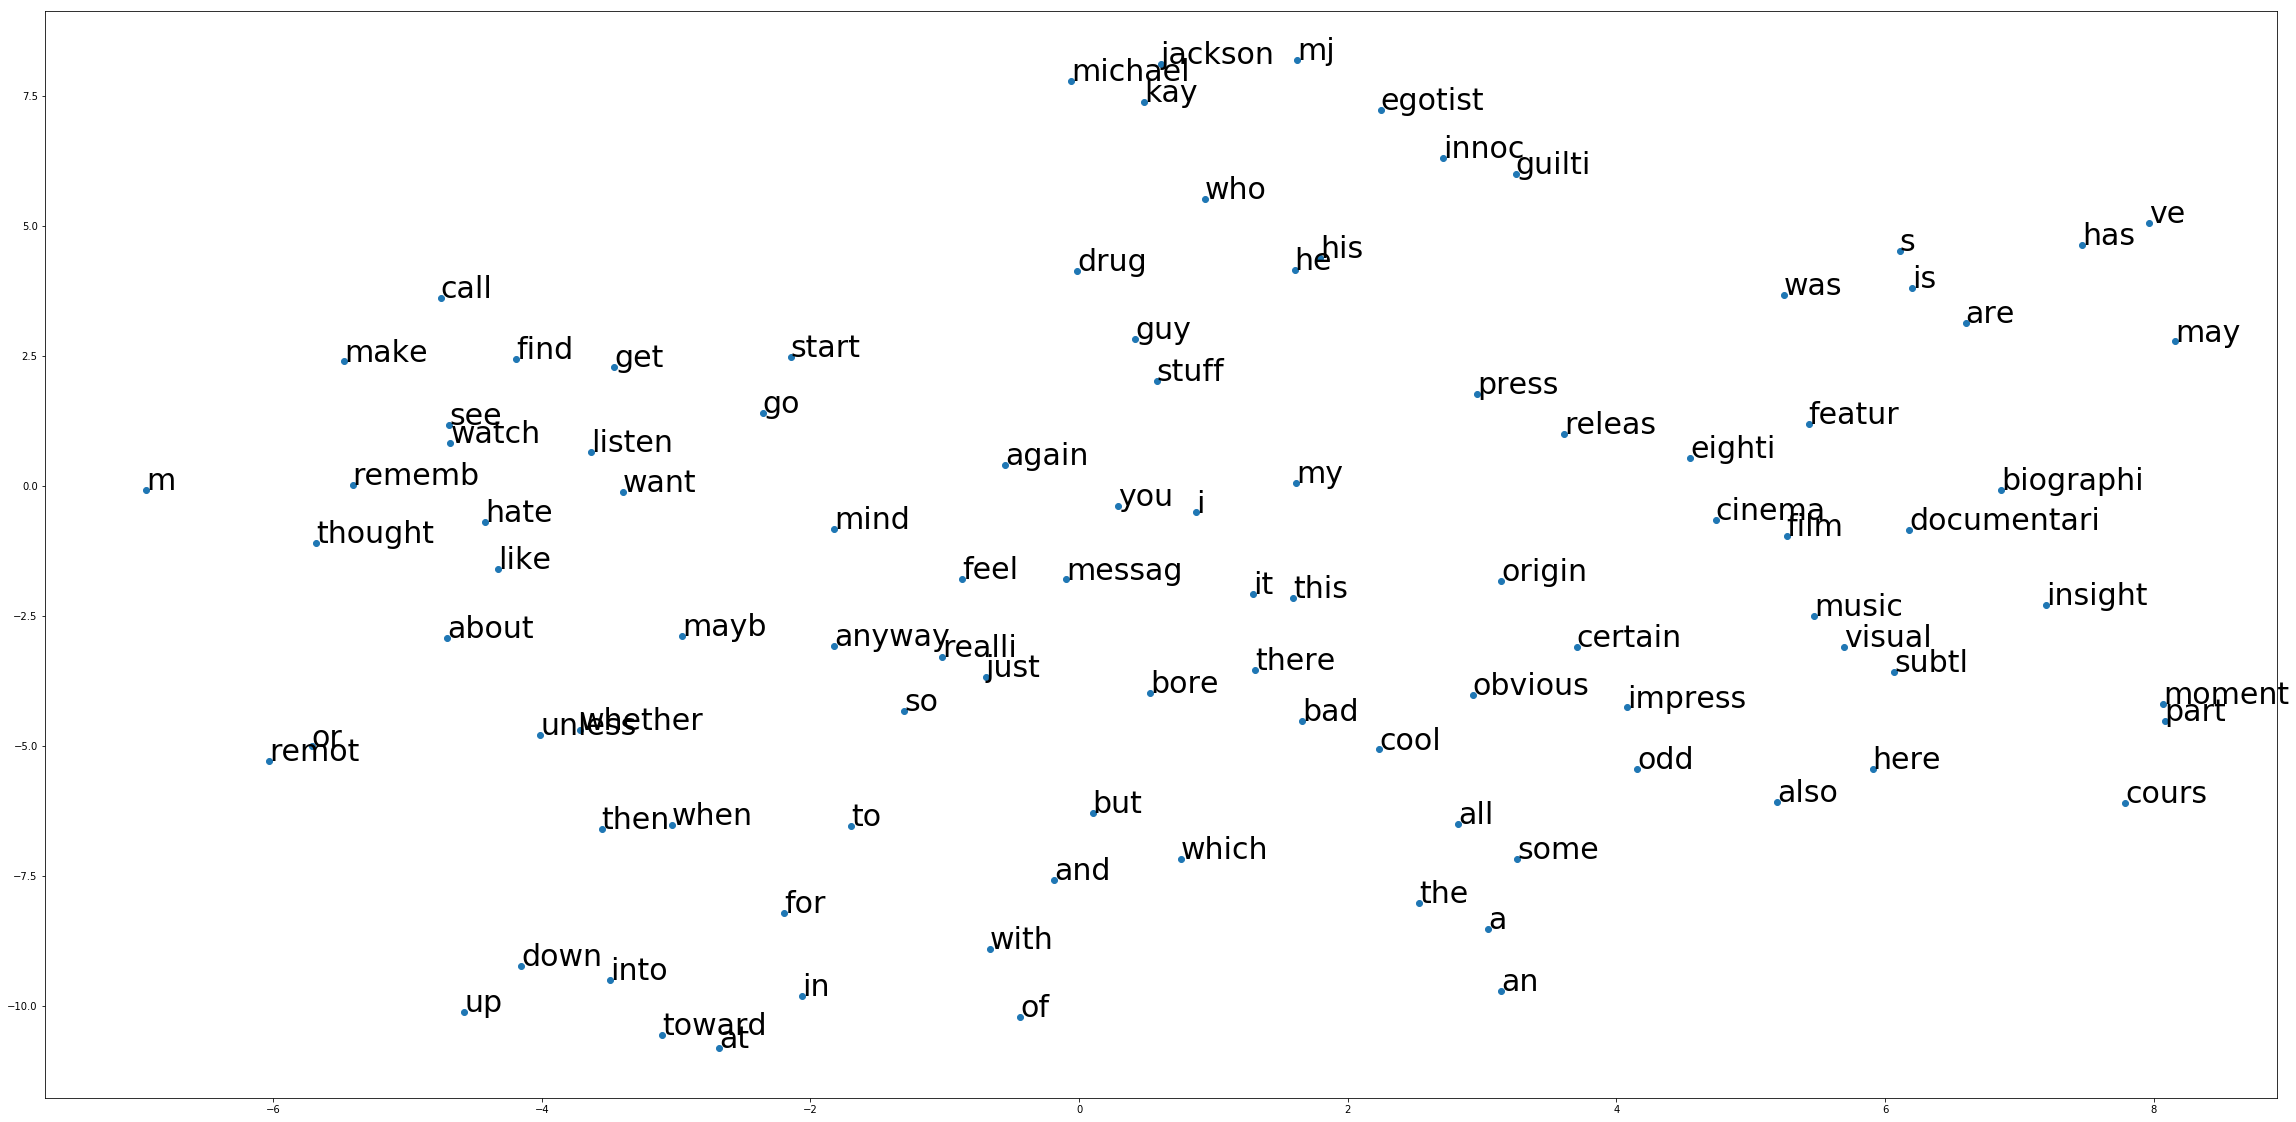

In [43]:
fig = plt.figure()
fig.set_size_inches(40,20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [45]:
model.wv.index2word[:10]

['the', 'and', 'a', 'of', 'to', 'is', 'it', 'in', 'i', 'this']

In [72]:
model['and'][:10]

array([ 0.07275347, -0.01586343,  0.00909527,  0.06193497,  0.072325  ,
       -0.06252164,  0.06214468, -0.02324742, -0.07018542, -0.0319511 ],
      dtype=float32)

In [46]:
import numpy as np

def makeFeatureVec(words, model, num_features):
    """
    주어진 문장에서 단어 벡터의 평균을 구하는 함수
    """
    # 속도를 위해 0으로 채운 배열로 초기화 한다.
    featureVec = np.zeros((num_features,), dtype="float32")
    
    nwords = 0
    # index2word는 모델의 사전에 있는 단어명을 담은 리스트이다.
    # 속도를 위해 set 형태로 초기화한다.
    index2word_set = set(model.wv.index2word)
    # 루프를 돌며 모델 사전에 포함이 되는 단어라면 피처에 추가한다
    for word in words:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model[word])
    # 결과를 단어수로 나누어 평균을 구한다.
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [48]:
def getAvgFeatureVecs(reviews, model, num_features):
    # 리뷰 단어 목록의 각각에 대한 평균 feature 벡터를 계산하고
    # 20numpy 배열을 반환한다.
    
    # 카운터를 초기화한다.
    counter = 0
    # 속도를 위해 20 넘파이 배열을 미리 할당한다.
    reviewFeatureVecs = np.zeros(
        (len(reviews), num_features), dtype="float32")
    
    for review in reviews:
        # 매 1000개 리뷰마다 상태를 출력
        if counter % 1000. == 0.:
            print("Review %d of %d" % (counter, len(reviews)))
        # 평균 피처 벡터를 만들기 위해 위에서 정의한 함수를 호출한다.
        reviewFeatureVecs[int(counter)] = makeFeatureVec(review, model,\
                                                        num_features)
        # 카운터를 증가시킨다.
        counter = counter + 1
    return reviewFeatureVecs

In [55]:
def getCleanReviews(reviews):
    clean_reviews = []
    clean_reviews = KaggleWord2VecUtility.apply_by_multiprocessing(\
                            reviews["review"], KaggleWord2VecUtility.review_to_wordlist,\
                            workers=4)
    return clean_reviews

In [56]:
%time trainDataVecs = getAvgFeatureVecs(\
            getCleanReviews(train), model, num_features)

Review 0 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
Wall time: 1min 30s


In [57]:
%time testDataVecs = getAvgFeatureVecs(\
            getCleanReviews(test), model, num_features)

Review 0 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
Wall time: 1min 28s


In [75]:
testDataVecs[0][:10]

array([ 0.01089144,  0.00400976, -0.02238488, -0.03843417,  0.00345981,
       -0.02583115,  0.02575841, -0.00363538, -0.01238632, -0.02488666],
      dtype=float32)

In [59]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators=100, n_jobs=-1, random_state=2018)

In [61]:
%time forest = forest.fit(trainDataVecs, train["sentiment"])

Wall time: 15.2 s


In [62]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(\
        forest, trainDataVecs,\
        train["sentiment"], cv=10, scoring='roc_auc'))

Wall time: 2min 40s


In [63]:
score

0.904784416

In [64]:
result = forest.predict(testDataVecs)

In [65]:
output = pd.DataFrame(data={"id":test["id"], "sentiment":result})
output.to_csv('./data/Word2Vec_AverageVectors_{0:.5f}.csv'.format(score),
             index=False, quoting=3)

* 300features_40minwords_10text 일 때 0.90709436799999987
* 300features_50minwords_20text 일 때 0.86815798399999999

In [66]:
output_sentiment = output['sentiment'].value_counts()
print(output_sentiment[0] - output_sentiment[1])
output_sentiment

278


0    12639
1    12361
Name: sentiment, dtype: int64

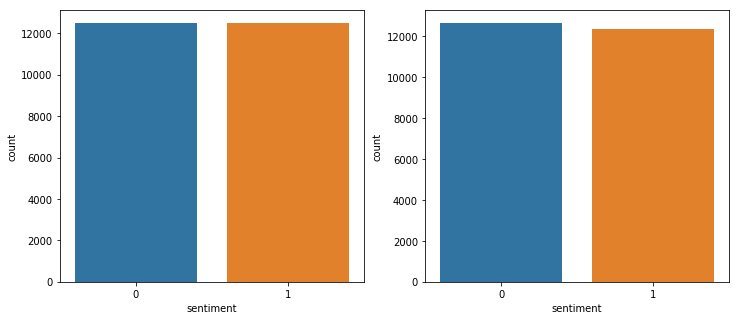

In [67]:
import seaborn as sns
%matplotlib inline

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.countplot(train['sentiment'], ax=axes[0])
sns.countplot(output['sentiment'], ax=axes[1])

In [69]:
545/578

0.9429065743944637